# [Task 0.0] : GPU Set up

Add GPU accelerator by clicking
Runtime>Change runtime type > Hardware accelerator

Change from None to GPU


Following code block should pass without triggering asserts if you did it rightly.

**Caution: Do not proceed further until this code block passes**




In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(f"We are training on {device} for this experiment")

assert 'cuda' in repr(device), "GPU is not selected in hardware accelerator dropdown"

We are training on cuda:0 for this experiment


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#[Task 0.1] : Google drive setup
Create a folder '*checkpoints*' in your google drive and make `your_google_drive_path` variable to point the '*checkpoints*' folder.

Following code block should pass without triggering asserts if you did it rightly.

**Caution: Do not proceed further until this code block passes** *italicised text*

In [ ]:
your_google_drive_path = "/content/drive/MyDrive/checkpoints/"
import os
assert os.path.isdir(your_google_drive_path), f"{your_google_drive_path} is not a valid location"


# Training a Classifier

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

## What about data?

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
ImageNet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


## Training an image classifier

We will do the following steps in order:

1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1. Load and normalize CIFAR10

Using ``torchvision``, it’s extremely easy to load CIFAR10.


In [ ]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



<div class="alert alert-info"><h4>Note</h4><p>If running on Windows and you get a BrokenPipeError, try setting
    the num_worker of torch.utils.data.DataLoader() to 0.</p></div>



In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

batch_size = 4

#Get dataset class object corresponding to train split
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)

#Create data loader from train dataset object
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

#Get dataset class object corresponding to test split
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

#Create data loader from test dataset object
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('0','1','2','3','4','5','6','7','8','9')

100%|██████████| 9912422/9912422 [00:00<00:00, 189868572.75it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 117039317.70it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 58403845.77it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 24486540.83it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Let us show some of the training images, for fun.



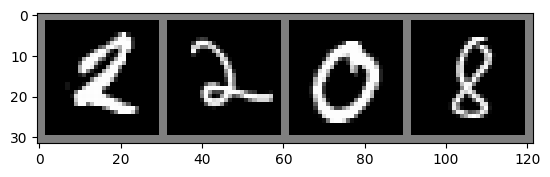

2     2     0     8    


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### 2. [Task 1] Define a Convolutional Neural Network without residual connections
Copy the neural network from your lab and modify it to
take 3-channel images (instead of 1-channel images as it was defined), and output 10 classes in final layer of FC
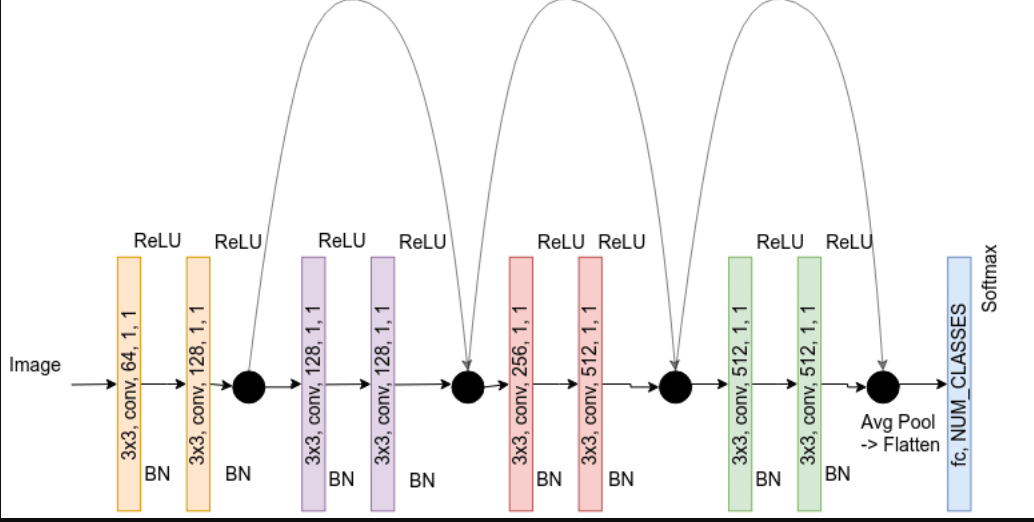



In [ ]:


import torch.nn as nn
import torch.nn.functional as F

#Define your own 'resnet9 without residual connections' neural network class with name 'Net' here
#Note :
######## Thou shall not use the following commented out Net() definition in final evaluation
######## This is placed here for you to play with incase your model class definition doesn't work

'''
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
'''

def conv_block(in_channels, out_channels, pool=False):
    layers = [
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True)
    ]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = conv_block(1, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))

        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))

        self.classifier = nn.Sequential(nn.MaxPool2d(2),
                                        nn.Flatten(),
                                        nn.Dropout(0.2),
                                        nn.Linear(512, 10),
                                        nn.Softmax(dim=1))
    def forward(self,x):
        out=self.conv1(x)
        out=self.conv2(out)
        out=self.res1(out)+out
        out=self.conv3(out)
        out=self.conv4(out)
        out=self.res2(out)+out
        out=self.classifier(out)
        return out


net = Net().to(device)

### 3. Define a Loss function and optimizer
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## This is validator code, Read section 5 first if you don't understand this, and then comback to this code

In [ ]:
def validator(testloader=None,net=None):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            # perform max along dimension 1, since dimension 0 is batch dimension
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
    return correct/total

### 4. Train the network

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [ ]:
start_epoch=0
end_epoch=10

#If you are resuming your model, Uncomment following lines

# checkpoint = torch.load(your_google_drive_path+'checkpoint.pth')
# start_epoch = checkpoint['epoch']+1
# net.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [ ]:
best_accuracy = -1.0
for epoch in range(start_epoch,end_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    current_accuracy = validator(testloader=testloader,net=net)
    if current_accuracy>best_accuracy:
        best_accuracy = current_accuracy

        torch.save(
            {'epoch':epoch,
             'model_state_dict': net.state_dict(),
             'optimizer_state_dict': optimizer.state_dict()
             },

             your_google_drive_path+'best_model.pth')

    #Save model as checkpoint
    torch.save(
        {'epoch':epoch,
         'model_state_dict': net.state_dict(),
         'optimizer_state_dict': optimizer.state_dict()
         },
         your_google_drive_path+'checkpoint.pth')



print('Finished Training')

[1,  2000] loss: 1.748
[1,  4000] loss: 1.596
[1,  6000] loss: 1.505
[1,  8000] loss: 1.489
[1, 10000] loss: 1.488
[1, 12000] loss: 1.484
[1, 14000] loss: 1.483
Accuracy of the network on the 10000 test images: 98 %
[2,  2000] loss: 1.481
[2,  4000] loss: 1.477
[2,  6000] loss: 1.475
[2,  8000] loss: 1.477
[2, 10000] loss: 1.478
[2, 12000] loss: 1.477
[2, 14000] loss: 1.474
Accuracy of the network on the 10000 test images: 98 %
[3,  2000] loss: 1.473
[3,  4000] loss: 1.474
[3,  6000] loss: 1.474
[3,  8000] loss: 1.472
[3, 10000] loss: 1.473
[3, 12000] loss: 1.473
[3, 14000] loss: 1.472
Accuracy of the network on the 10000 test images: 99 %
[4,  2000] loss: 1.468
[4,  4000] loss: 1.472
[4,  6000] loss: 1.470
[4,  8000] loss: 1.472
[4, 10000] loss: 1.470
[4, 12000] loss: 1.470
[4, 14000] loss: 1.471
Accuracy of the network on the 10000 test images: 99 %
[5,  2000] loss: 1.468
[5,  4000] loss: 1.469
[5,  6000] loss: 1.469
[5,  8000] loss: 1.469
[5, 10000] loss: 1.469
[5, 12000] loss: 1.46

### 5. Test the network on the test data

We have trained the network for `end_epoch` passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



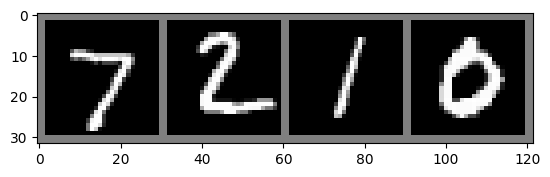

GroundTruth:  7     2     1     0    


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Load your best saved model and see what the neural network thinks these examples above are:

In [ ]:
net_best = Net().to(device)
checkpoint = torch.load(your_google_drive_path+'best_model.pth')
net_best.load_state_dict(checkpoint['model_state_dict'])


images = images.to(device)
labels = labels.to(device)

outputs = net_best(images)

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  7     2     1     0    


# [Task 2] : Optional
Modify following function to return "total accuracy" which is caclculated from "class wise" accuracies and replace `validator()` function in training loop with `validator_classwise()` function.

In [ ]:
def validator_classwise(testloader=None,net=None, classes=None):
    # prepare to count predictions for each class
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # again no gradients needed
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1


    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

    return #your total accuracy variable

#Test your logic by uncommenting following line
#validator_classwise(testloader=testloader,net=net_best, classes=classes)

#[Task 3] : Optional
Tune `batch_size` for full GPU utilization